# Titanic Survival Prediction Using Logistic regression

In [4]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## Data Collection 

In [5]:
titanic_dataset=pd.read_csv('train.csv')
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# number of rows and columns

titanic_dataset.shape

(891, 12)

In [7]:
# more information about dataset

titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# checking null values

titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# statistical measure of out dataset

titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# handling the missing values

# in cabin column most the values is missing so we drop the cabin column

titanic_dataset=titanic_dataset.drop(columns='Cabin',axis=1)


In [12]:
# in age column we replace the missing value with mean 

mean=titanic_dataset['Age'].mean()

In [13]:
mean

29.69911764705882

In [14]:
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(),inplace=True)

In [15]:
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [19]:
# in embarked column we replace the the missing value with most repeated number of times

mode=titanic_dataset['Embarked'].mode()[0]
mode

'S'

In [20]:
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0],inplace=True)

In [21]:
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##  Data Analysis

In [22]:
# getting some statistical measure about the data

titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
# finding the number of people survived and who didn't

titanic_dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

- 549 didn't survived
- 342 did survive

### Data Visualization

In [24]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

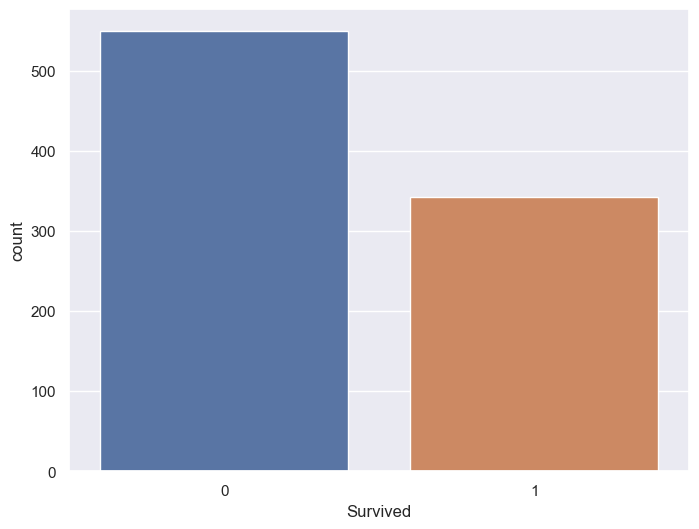

In [29]:
# making a countplot for survived column

plt.figure(figsize=(8,6))
sns.countplot(x='Survived',data=titanic_dataset)


<Axes: xlabel='Sex', ylabel='count'>

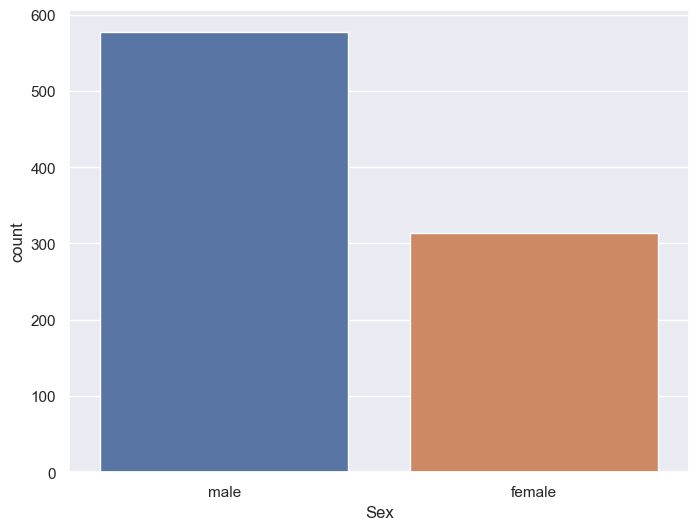

In [30]:

plt.figure(figsize=(8,6))
sns.countplot(x='Sex',data=titanic_dataset)

In [31]:
titanic_dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

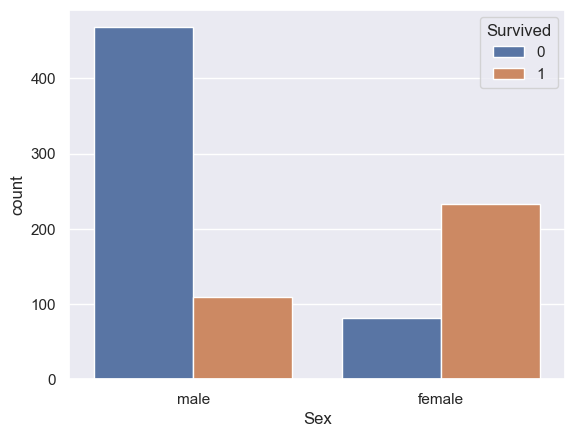

In [33]:
# number of survivors based on gender

sns.countplot(x='Sex',hue='Survived',data=titanic_dataset)

<Axes: xlabel='Pclass', ylabel='count'>

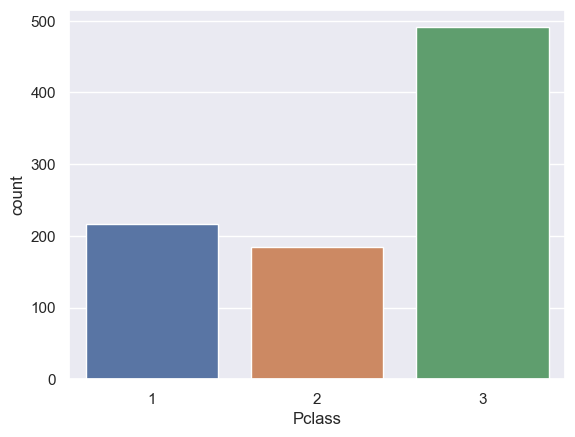

In [34]:
# making countplot for p class

sns.countplot(x='Pclass',data=titanic_dataset)

<Axes: xlabel='Pclass', ylabel='count'>

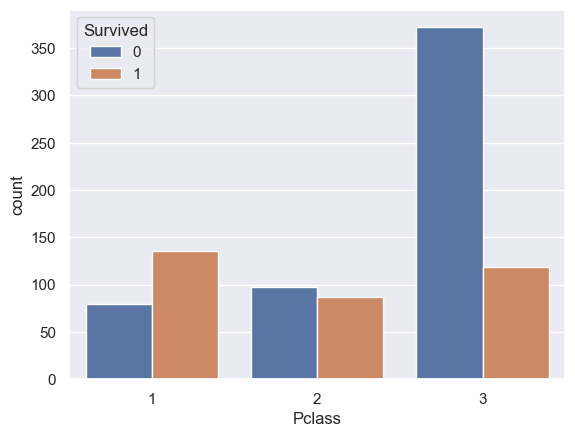

In [35]:
# number of survivors based on pclass

sns.countplot(x='Pclass',hue='Survived',data=titanic_dataset)

#### Encoding categorical columns

In [38]:
titanic_dataset.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [44]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [43]:
titanic_dataset.drop(columns=['Name','Ticket'],inplace=True)

#### spliting the data

In [45]:
X=titanic_dataset.drop(columns='Survived',axis=1)
y=titanic_dataset['Survived']

In [46]:
# training and testing data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [47]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(712, 8) (179, 8) (712,) (179,)


## Training the model

In [48]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [49]:
# on training data
train_model_pred=model.predict(X_train)
train_model_acc=accuracy_score(train_model_pred,y_train)
print("Accuracy Score :",round(train_model_acc*100,2),'%')

Accuracy Score : 80.2 %


In [51]:
# on testing data
test_model_pred=model.predict(X_test)
test_model_acc=accuracy_score(test_model_pred,y_test)
print("Accuracy Score :",round(test_model_acc*100,2),'%')

Accuracy Score : 79.89 %


## Predictive System

In [57]:
input_data=(28,1,0,19,3,2,263,0)
input_data_array=np.array(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
prediction

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)